In [1]:
!pip3 install keras

    100% |████████████████████████████████| 327kB 2.5MB/s 


In [173]:
!top

=top - 13:37:11 up  8:30,  0 users,  load average: 0.02, 0.42, 0.60
Tasks:   7 total,   1 running,   6 sleeping,   0 stopped,   0 zombie
%Cpu(s):  2.3 us,  1.0 sy,  0.0 ni, 96.7 id,  0.0 wa,  0.0 hi,  0.0 si,  0.0 st
KiB Mem : 13341960 total,   174132 free,  5484712 used,  7683116 buff/cache
KiB Swap:        0 total,        0 free,        0 used.  7237180 avail Mem 

  PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND     
   94 root      20   0  182908  57512  12328 S   6.7  0.4   0:54.90 jupyter-no+ 
    1 root      20   0   39140   6576   5200 S   0.0  0.0   0:00.07 run.sh      
   74 root      20   0  677272  38668  21536 S   0.0  0.3   0:06.02 node        
   84 root      20   0  713184  66072  22908 S   0.0  0.5   0:43.55 node        
  115 root      20   0 42.621g 5.292g 477568 S   0.0 41.6  24:09.97 python3     
  267 root      20   0   33960   4860   3760 S   0.0  0.0   0:00.23 sh          
  268 root      20   0   65356   7180   5428 R   0.0  0.1   0:

In [0]:
!rm *.jpg.1

In [1]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [12]:
# https://opencv.org/
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

Selecting previously unselected package libxext6:amd64.
(Reading database ... 16669 files and directories currently installed.)
Preparing to unpack .../libxext6_2%3a1.3.3-1_amd64.deb ...
Unpacking libxext6:amd64 (2:1.3.3-1) ...
Selecting previously unselected package x11-common.
Preparing to unpack .../x11-common_1%3a7.7+19ubuntu3_all.deb ...
Unpacking x11-common (1:7.7+19ubuntu3) ...
Selecting previously unselected package libice6:amd64.
Preparing to unpack .../libice6_2%3a1.0.9-2_amd64.deb ...
Unpacking libice6:amd64 (2:1.0.9-2) ...
Selecting previously unselected package libsm6:amd64.
Preparing to unpack .../libsm6_2%3a1.2.2-1_amd64.deb ...
Unpacking libsm6:amd64 (2:1.2.2-1) ...
Setting up libxext6:amd64 (2:1.3.3-1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up x11-common (1:7.7+19ubuntu3) ...
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.

In [3]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
print(cv.__version__)

3.4.0


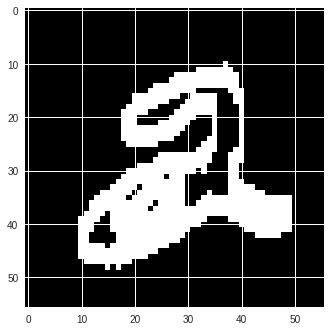

In [4]:
img = x_train[5].reshape((28, 28))
img = np.uint8(img * 255)
img = cv.resize(img, (56, 56))
img = cv.Canny(img, 100, 200)
img = cv.dilate(img, (3, 3))
img = cv.dilate(img, (3, 3))
img = cv.dilate(img, (3, 3))
plt.imshow(img,cmap = 'gray')
plt.show()

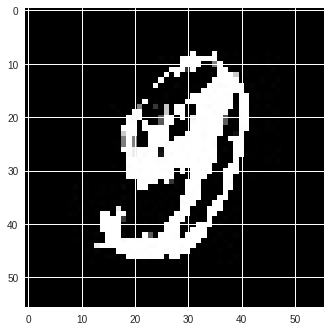

In [12]:
img = cv.imread("9.jpg", 0)
#img = img[:, int(img.shape[1] * 0.2) : int(img.shape[1] * 0.8)]
#img = cv.resize(img, (56, 56))
#edges = cv.Canny(img, 100, 200)
plt.imshow(img,cmap = 'gray')
plt.show()

In [0]:
x_train_real = []
for i in range(x_train.shape[0]):
  img = x_train[i].reshape((28, 28))
  img = np.uint8(img * 255)
  img = cv.resize(img, (56, 56))
  img = cv.Canny(img, 100, 200)
  img = cv.dilate(img, (3, 3))
  img = cv.dilate(img, (3, 3))
  img = cv.dilate(img, (3, 3))
  img = img / 255
  x_train_real.append(img.reshape((56, 56, 1)))
  
x_train_real = np.array(x_train_real)

In [14]:
x_train_real.shape

(60000, 56, 56, 1)

In [0]:
x_test_real = []
for i in range(x_test.shape[0]):
  img = x_test[i].reshape((28, 28))
  img = np.uint8(img * 255)
  img = cv.resize(img, (56, 56))
  img = cv.Canny(img, 100, 200)
  img = cv.dilate(img, (3, 3))
  img = cv.dilate(img, (3, 3))
  img = cv.dilate(img, (3, 3))
  img = img / 255
  x_test_real.append(img.reshape((56, 56, 1)))

x_test_real = np.array(x_test_real)

In [16]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(56, 56, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(56, 56, 1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_real, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_real, y_test))
score = model.evaluate(x_test_real, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 53s 881us/step - loss: 0.2535 - acc: 0.9194 - val_loss: 0.0531 - val_acc: 0.9817
Epoch 2/12
13952/60000 [=====>........................] - ETA: 37s - loss: 0.0773 - acc: 0.976960000/60000 [==============================] - 51s 845us/step - loss: 0.0714 - acc: 0.9786 - val_loss: 0.0417 - val_acc: 0.9860
Epoch 3/12
39680/60000 [==================>...........] - ETA: 16s - loss: 0.0527 - acc: 0.984160000/60000 [==============================] - 51s 845us/step - loss: 0.0510 - acc: 0.9846 - val_loss: 0.0322 - val_acc: 0.9885
Epoch 4/12
49280/60000 [=======================>......] - ETA: 8s - loss: 0.0379 - acc: 0.988060000/60000 [==============================] - 51s 844us/step - loss: 0.0380 - acc: 0.9880 - val_loss: 0.0340 - val_acc: 0.9902
Epoch 5/12
53248/60000 [=========================>....] - ETA: 5s - loss: 0.0330 - acc: 0.989860000/60000 [==============================] - 51

In [0]:
model.save("model.h5")

In [10]:
!wget https://qasd.tk:8021/9.jpg
!wget https://qasd.tk:8021/8.jpg
!wget https://qasd.tk:8021/7.jpg
!wget https://qasd.tk:8021/6.jpg
!wget https://qasd.tk:8021/5.jpg
!wget https://qasd.tk:8021/4.jpg
!wget https://qasd.tk:8021/3.jpg
!wget https://qasd.tk:8021/2.jpg
!wget https://qasd.tk:8021/1.jpg

--2018-03-04 13:39:51--  https://qasd.tk:8021/9.jpg
Resolving qasd.tk (qasd.tk)... 45.77.125.95
Connecting to qasd.tk (qasd.tk)|45.77.125.95|:8021... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1638 (1.6K) [image/jpeg]
Saving to: ‘9.jpg’

9.jpg               100%[===================>]   1.60K  --.-KB/s    in 0s      

2018-03-04 13:39:51 (336 MB/s) - ‘9.jpg’ saved [1638/1638]

--2018-03-04 13:39:52--  https://qasd.tk:8021/8.jpg
Resolving qasd.tk (qasd.tk)... 45.77.125.95
Connecting to qasd.tk (qasd.tk)|45.77.125.95|:8021... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1576 (1.5K) [image/jpeg]
Saving to: ‘8.jpg’

8.jpg               100%[===================>]   1.54K  --.-KB/s    in 0s      

2018-03-04 13:39:52 (61.0 MB/s) - ‘8.jpg’ saved [1576/1576]

--2018-03-04 13:39:52--  https://qasd.tk:8021/7.jpg
Resolving qasd.tk (qasd.tk)... 45.77.125.95
Connecting to qasd.tk (qasd.tk)|45.77.125.95|:8021... connected.
HTTP request sent, awaiting respon

In [10]:
print(input_shape)

(28, 28, 1)


In [0]:
import keras

In [0]:
model = keras.models.load_model("model.h5")

In [93]:
!ls

1.jpg  3.jpg  5.jpg  7.jpg  9.jpg    model.h5
2.jpg  4.jpg  6.jpg  8.jpg  datalab


In [19]:
for i in range(1, 10):
  img = cv.imread("{}.jpg".format(i), 0)
  #img = img[:, int(img.shape[1] * 0.2) : int(img.shape[1] * 0.8)]
  #img = cv.resize(img, (56, 56))
  #edges = cv.Canny(img, 100, 200)
  np_image_data = np.asarray(img)
  np_image_data = np_image_data.astype('float32') / 255
  np_image_data = np_image_data.reshape((1, 56, 56, 1))
  print("number:{}".format(i))
  print(model.predict(np_image_data))

number:1
[[1.2754163e-10 9.9998021e-01 1.9820282e-05 6.1570964e-11 2.0302664e-08
  7.5011369e-10 2.4870316e-08 1.9719215e-10 1.8145725e-10 1.4895713e-11]]
number:2
[[3.6121833e-08 4.4353446e-04 9.9948090e-01 8.7488452e-08 5.2797873e-07
  1.4302201e-10 4.5377480e-09 1.9321114e-10 7.4940355e-05 4.8811451e-08]]
number:3
[[7.3921444e-07 1.3254756e-06 1.6756469e-05 9.0774798e-01 1.0739082e-07
  9.2218235e-02 1.5073532e-06 3.8613675e-06 1.7534188e-07 9.3670978e-06]]
number:4
[[4.2126089e-06 5.1763804e-05 6.2353702e-06 4.6279547e-05 9.7561151e-01
  9.0470512e-06 5.1219996e-07 3.9006202e-03 1.1558494e-03 1.9214019e-02]]
number:5
[[4.3494488e-06 8.4551749e-07 2.1422307e-08 3.9803769e-04 2.9264041e-10
  9.9959141e-01 2.9902347e-07 3.0083079e-06 1.0832608e-09 1.9924055e-06]]
number:6
[[3.6259109e-05 1.4239361e-08 1.1876340e-09 2.7917935e-07 2.4698552e-06
  2.6935002e-01 7.3050934e-01 9.6606563e-08 9.7168304e-05 4.3458572e-06]]
number:7
[[1.7942203e-06 9.8542345e-01 8.4207822e-03 1.4258336e-03 6.9